Импорт необходимых библиотек  для проекта по визуализации

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

I. Знакомство с данными
Загрузка файлов для анализа

In [3]:
data_1 = pd.read_csv('nafld1.csv')
data_2 = pd.read_csv('nafld2.csv')
data_3 = pd.read_csv('nwtco.csv')
data_4 = pd.read_csv('nafld3.csv')

Иформация содержимого файла: тип данных, размер таблицы для файла №1

In [43]:
data_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [44]:
data_1.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


Проверка на пропуски, их вузализация и стратегия их дальнейшей обработки для файла №2

In [6]:
data_1.isna().sum()

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64

In [ ]:
data_1.plot(
    kind='bar',
    figsize=(8, 4),
    title='Распределение пропусков в данных'
);

Основные статистики, выбросы, вывод для файла №1

In [9]:
data_1.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17549.0,8780.11,5070.54,1.00,4389.00,8778.00,13171.00,17566.0
id,17549.0,8784.22,5070.97,1.00,4393.00,8786.00,13175.00,17566.0
age,17549.0,52.66,14.72,18.00,42.00,53.00,63.00,98.0
male,17549.0,0.47,0.50,0.00,0.00,0.00,1.00,1.0
weight,12763.0,86.35,22.24,33.40,70.00,83.90,99.20,181.7
height,14381.0,169.43,10.14,123.00,162.00,169.00,177.00,215.0
bmi,12588.0,30.07,7.09,9.21,25.14,28.88,33.71,84.4
case.id,17518.0,8840.92,5051.33,3.00,4598.00,8781.00,13249.00,17563.0
futime,17549.0,2410.60,1573.02,7.00,1132.00,2148.00,3353.00,7268.0
status,17549.0,0.08,0.27,0.00,0.00,0.00,0.00,1.0


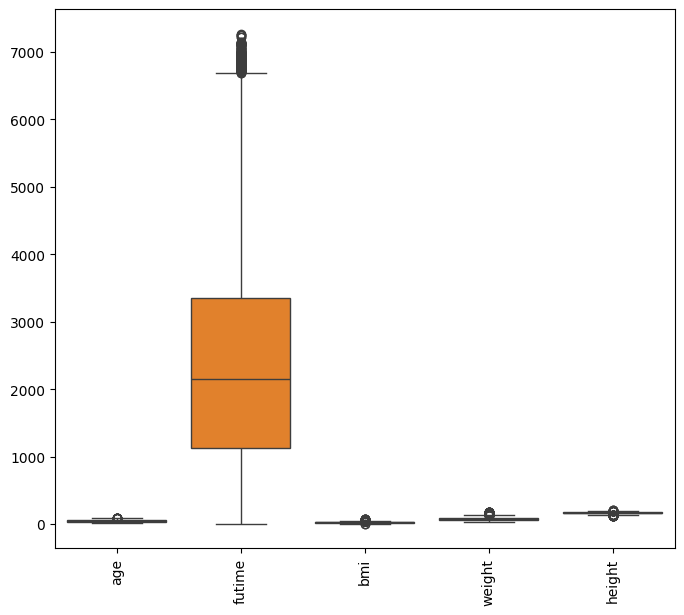

In [10]:
numeric_columns = ['age', 'futime', 'bmi', 'weight','height']

"""Create a box plot for numerical columns"""
plt.figure(figsize=(8, 7))
sns.boxplot(data=data_1[numeric_columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

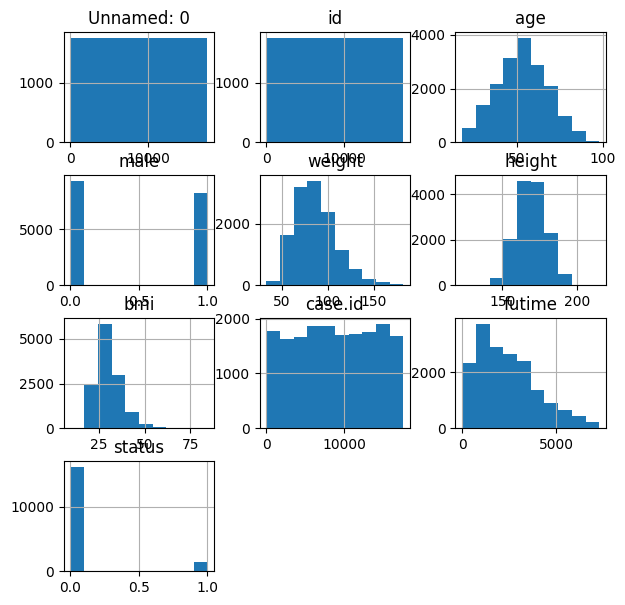

In [38]:
data_1.hist(figsize=(7,7))
plt.show()

In [51]:
data_1_p_t = data_1.pivot_table(
    values='age',
    index='status',
    columns='male',
    aggfunc=['mean']
)
data_1_p_t

mean           
male            0          1
status                      
0       52.031358  50.384103
1       70.544510  67.857971

In [66]:
data_1_p_t = data_1.pivot_table(
    values='bmi',
    index='status',
    columns='male',
    aggfunc=['mean']
)
data_1_p_t

mean           
male            0          1
status                      
0       29.909546  30.286580
1       30.092395  30.031839

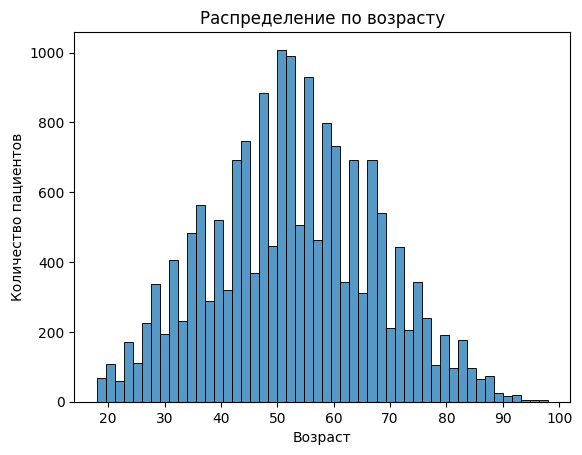

In [68]:
sns.histplot(data_1['age'])
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.title('Распределение по возрасту')
plt.show()

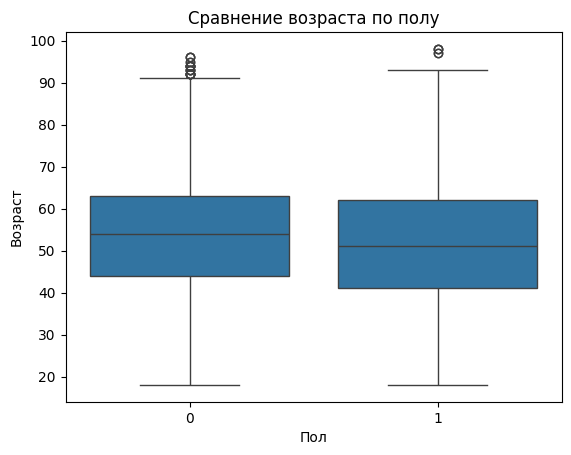

In [40]:
sns.boxplot(x='male', y='age', data=data_1)
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.title('Сравнение возраста по полу')
plt.show()

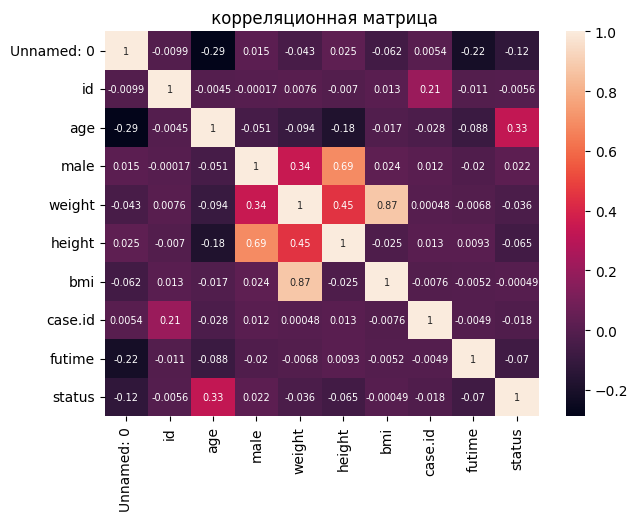

In [38]:
cor_mat_data_1 = data_1.corr()
plt.figure(figsize=(7, 5))  # Ajuster la taille de la heatmap
sns.heatmap(cor_mat_data_1, annot=True, annot_kws={"size": 7})  # Ajuster la taille des annotations
plt.title(' корреляционная матрица')
plt.show()

In [ ]:
#dinamic_by_case = data_1[
            ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
        ].groupby('Year_of_Release').sum()

#fig = plt.figure(figsize=(9, 5))
#lineplot = sns.lineplot(data=dinamic_by_case)
#lineplot.set_title('Динамика выявления НАЖДП', fontsize=16)
#lineplot.set_xlabel('время в днях')
#lineplot.set_ylabel('Суммарный объём продаж')

II. Предобработка данных

Иформация содержимого файла: тип данных, размер таблицы для файла №2

In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


In [6]:
data_2.head()

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0


In [14]:
data_2['Unnamed: 0'].value_counts(normalize=True)*100

Unnamed: 0
135077    0.00025
319981    0.00025
430626    0.00025
252498    0.00025
319989    0.00025
           ...   
301794    0.00025
123737    0.00025
301793    0.00025
123736    0.00025
346653    0.00025
Name: proportion, Length: 400123, dtype: float64

<bound method IndexOpsMixin.nunique of 0         135077
1         313143
2         135078
3         313144
4         135079
           ...  
400118    346651
400119    168565
400120    346652
400121    168566
400122    346653
Name: Unnamed: 0, Length: 400123, dtype: int64>

In [17]:
data_2['test'].value_counts()

test
hdl      161259
chol     161258
sbp       33430
dbp       33430
smoke      7008
fib4       3738
Name: count, dtype: int64

In [18]:
data_2_pivoted = data_2.pivot(
    columns=['test'],
    index=['Unnamed: 0', 'id','days'],
    values=['value']).reset_index()

data_2_pivoted.head()

Unnamed: 0     id  days value                            
test                          chol dbp      fib4 hdl sbp smoke
0             1  11217  -716   NaN NaN  2.992760 NaN NaN   NaN
1             2  10234  2534   NaN NaN  4.178475 NaN NaN   NaN
2             3   8623  1926   NaN NaN  2.804991 NaN NaN   NaN
3             4   8197 -5354   NaN NaN  3.251205 NaN NaN   NaN
4             5  14877   906   NaN NaN  2.774775 NaN NaN   NaN

In [19]:
data_2_pivoted.columns

MultiIndex([('Unnamed: 0',      ''),
            (        'id',      ''),
            (      'days',      ''),
            (     'value',  'chol'),
            (     'value',   'dbp'),
            (     'value',  'fib4'),
            (     'value',   'hdl'),
            (     'value',   'sbp'),
            (     'value', 'smoke')],
           names=[None, 'test'])

In [ ]:
def extract_index(index_tulpe):
    """ Preprocessing function for summary table """
    first, second = index_tulpe
    if not second:
        return first
    return second
            

In [21]:
data_2_pivoted.columns = data_2_pivoted.columns.map(extract_index)
data_2_pivoted.info()
data_2_pivoted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   chol        161258 non-null  float64
 4   dbp         33430 non-null   float64
 5   fib4        3738 non-null    float64
 6   hdl         161259 non-null  float64
 7   sbp         33430 non-null   float64
 8   smoke       7008 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 27.5 MB


,Unnamed: 0,id,days,chol,dbp,fib4,hdl,sbp,smoke
0,1,11217,-716,NaN,NaN,2.992760,NaN,NaN,NaN
1,2,10234,2534,NaN,NaN,4.178475,NaN,NaN,NaN
2,3,8623,1926,NaN,NaN,2.804991,NaN,NaN,NaN
3,4,8197,-5354,NaN,NaN,3.251205,NaN,NaN,NaN
4,5,14877,906,NaN,NaN,2.774775,NaN,NaN,NaN


In [22]:
cols_with_null = data_2_pivoted.isna().sum()                                 

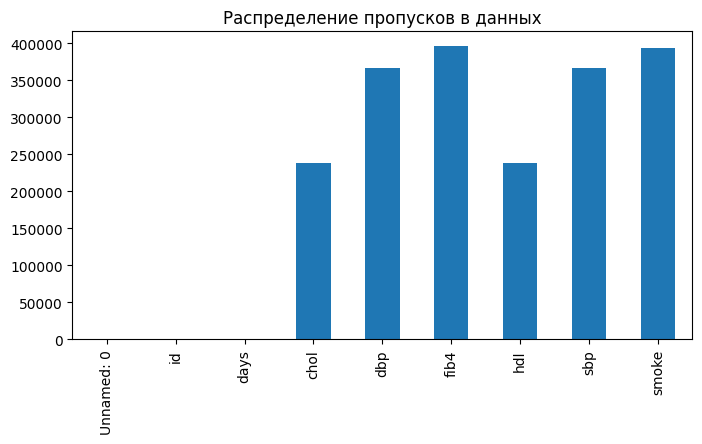

In [23]:
cols_with_null.plot(
    kind='bar',
    figsize=(8, 4),
    title='Распределение пропусков в данных'
);

In [24]:
data_2_pivoted.duplicated().sum()

np.int64(0)

In [ ]:
data_2_new=data_2.drop(['test','value'],axis=1)
data_2_new.head()

,Unnamed: 0,id,days
0,135077,1,-459
1,313143,1,-459
2,135078,1,183
3,313144,1,183
4,135079,1,2030


In [ ]:
data_2['days'].value_counts()

days
-365     1266
-364      294
-372      181
-379      173
-363      161
         ... 
 5310       1
 6528       1
 6473       1
 5913       1
 6698       1
Name: count, Length: 13081, dtype: int64

In [69]:
data_2['value'].value_counts().round(1)

value
42.000000    9656
44.000000    9600
43.000000    9540
40.000000    9434
45.000000    9374
             ... 
2.907031        1
2.937380        1
2.812500        1
2.904875        1
2.966251        1
Name: count, Length: 3894, dtype: int64

Проверка на пропуски, их вузализация и стратегия их дальнейшей обработки для файла №2

In [15]:
data_2.isna().sum()

Unnamed: 0    0
id            0
days          0
test          0
value         0
dtype: int64

Основные статистики, выбросы, вывод для файла №2

In [16]:
data_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,400123.0,NaN,NaN,NaN,223150.240971,127822.738489,1.0,113131.5,222978.0,334078.5,444423.0
id,400123.0,NaN,NaN,NaN,8799.153905,5080.553294,1.0,4410.5,8813.0,13159.0,17566.0
days,400123.0,NaN,NaN,NaN,-606.916616,2415.953135,-7651.0,-2259.0,-530.0,987.0,7187.0
test,400123,6,hdl,161259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,400123.0,NaN,NaN,NaN,63.768339,48.455567,0.0,40.0,51.0,72.0,13682.0


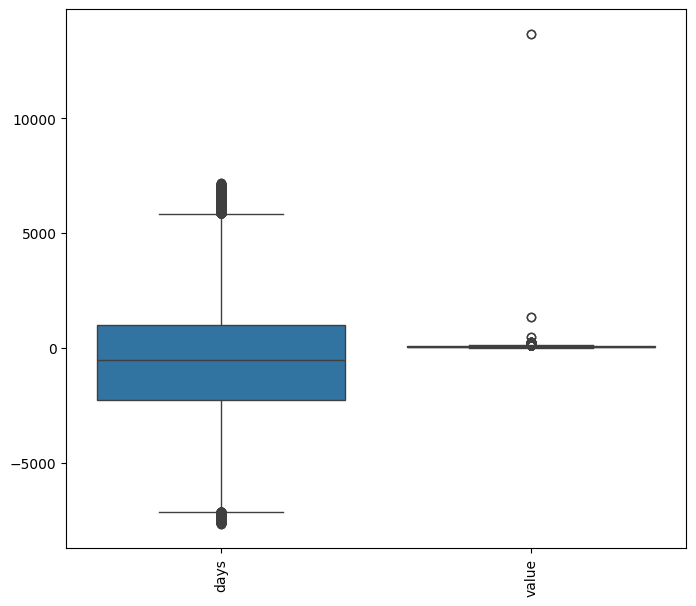

In [25]:
numeric_columns = [ 'days','value']

"""Create a box plot for numerical columns"""
plt.figure(figsize=(8, 7))
sns.boxplot(data=data_2[numeric_columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

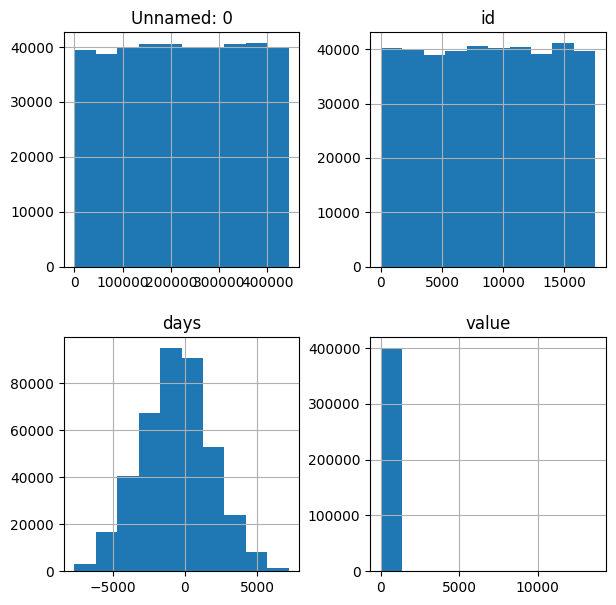

In [37]:
data_2.hist(figsize=(7,7))
plt.show()

Иформация содержимого файла: тип данных, размер таблицы для файла №3

In [20]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    4028 non-null   int64
 1   seqno         4028 non-null   int64
 2   instit        4028 non-null   int64
 3   histol        4028 non-null   int64
 4   stage         4028 non-null   int64
 5   study         4028 non-null   int64
 6   rel           4028 non-null   int64
 7   edrel         4028 non-null   int64
 8   age           4028 non-null   int64
 9   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(9)
memory usage: 287.3 KB


In [21]:
data_3.head()

,Unnamed: 0,seqno,instit,histol,stage,study,rel,edrel,age,in.subcohort
0,1,1,2,2,1,3,0,6075,25,False
1,2,2,1,1,2,3,0,4121,50,False
2,3,3,2,2,1,3,0,6069,9,False
3,4,4,2,1,4,3,0,6200,28,True
4,5,5,2,2,2,3,0,1244,55,False


Проверка на пропуски, их вузализация и стратегия их дальнейшей обработки для файла №3

In [22]:
data_3.isna().sum()

Unnamed: 0      0
seqno           0
instit          0
histol          0
stage           0
study           0
rel             0
edrel           0
age             0
in.subcohort    0
dtype: int64

Основные статистики, выбросы, вывод для файла №3

In [25]:
data_3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4028.0,NaN,NaN,NaN,2025.548411,1173.900596,1.0,1008.75,2022.5,3039.25,4088.0
seqno,4028.0,NaN,NaN,NaN,2025.548411,1173.900596,1.0,1008.75,2022.5,3039.25,4088.0
instit,4028.0,NaN,NaN,NaN,1.100794,0.301094,1.0,1.0,1.0,1.0,2.0
histol,4028.0,NaN,NaN,NaN,1.113952,0.317793,1.0,1.0,1.0,1.0,2.0
stage,4028.0,NaN,NaN,NaN,2.072493,1.037517,1.0,1.0,2.0,3.0,4.0
study,4028.0,NaN,NaN,NaN,3.538977,0.49854,3.0,3.0,4.0,4.0,4.0
rel,4028.0,NaN,NaN,NaN,0.141758,0.348845,0.0,0.0,0.0,0.0,1.0
edrel,4028.0,NaN,NaN,NaN,2276.680238,1640.179134,4.0,856.75,1939.0,3561.0,6209.0
age,4028.0,NaN,NaN,NaN,42.64002,31.177974,0.0,19.0,37.0,58.0,191.0
in.subcohort,4028,2,False,3360,NaN,NaN,NaN,NaN,NaN,NaN,NaN


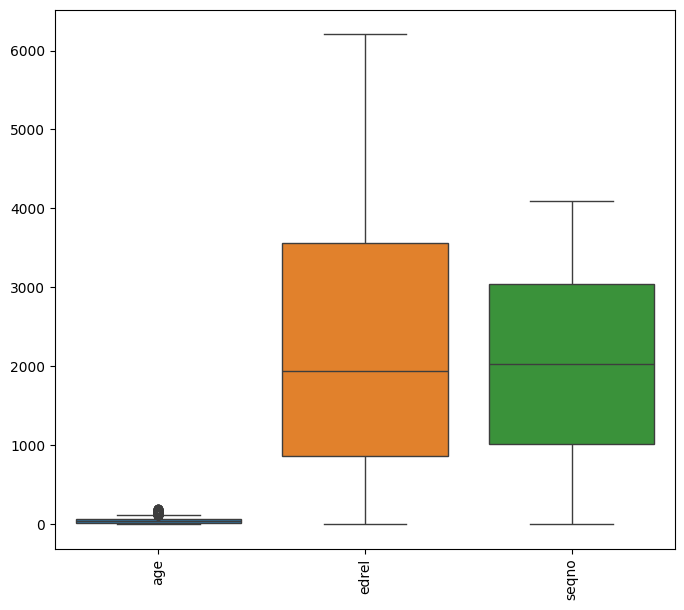

In [27]:
numeric_columns = ['age', 'edrel', 'seqno']

"""Create a box plot for numerical columns"""
plt.figure(figsize=(8, 7))
sns.boxplot(data=data_3[numeric_columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

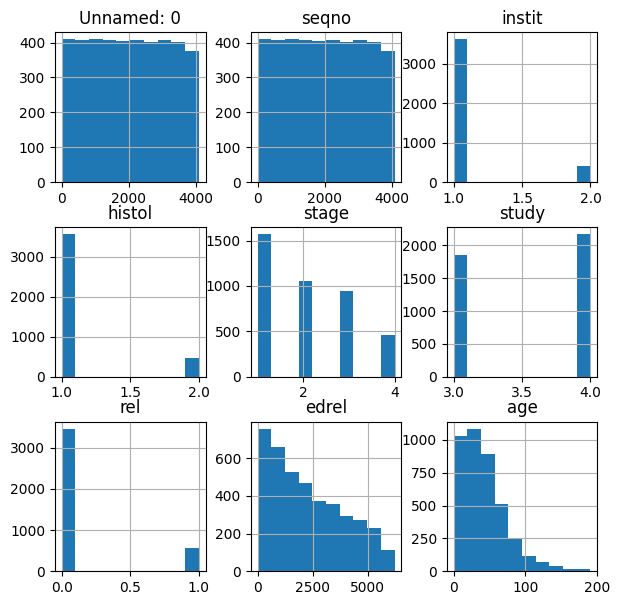

In [39]:
data_3.hist(figsize=(7,7))
plt.show()

Иформация содержимого файла: тип данных, размер таблицы для файла №4

In [28]:
data_4.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34340 entries, 0 to 34339
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  34340 non-null  int64 
 1   id        34340 non-null  int64 
 2   days      34340 non-null  int64 
 3   event     34340 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.0+ MB


In [29]:
data_4.head()

,rownames,id,days,event
0,2,3,0,nafld
1,3,4,-1287,htn
2,4,4,-1287,dyslipidemia
3,5,4,-1226,ang/isc
4,7,4,-90,ang/isc


Проверка на пропуски, их вузализация и стратегия их дальнейшей обработки для файла №4

In [30]:
data_4.isna().sum()

rownames    0
id          0
days        0
event       0
dtype: int64

Основные статистики, выбросы, вывод для файла №4

In [31]:
data_4.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownames,34340.0,NaN,NaN,NaN,19286.78081,11140.230743,2.0,9655.75,19274.5,28924.25,38595.0
id,34340.0,NaN,NaN,NaN,8746.168666,5068.095337,3.0,4342.0,8753.0,13119.25,17566.0
days,34340.0,NaN,NaN,NaN,-1161.363454,2380.252885,-16700.0,-2651.0,-668.5,62.0,6652.0
event,34340,10,dyslipidemia,10462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


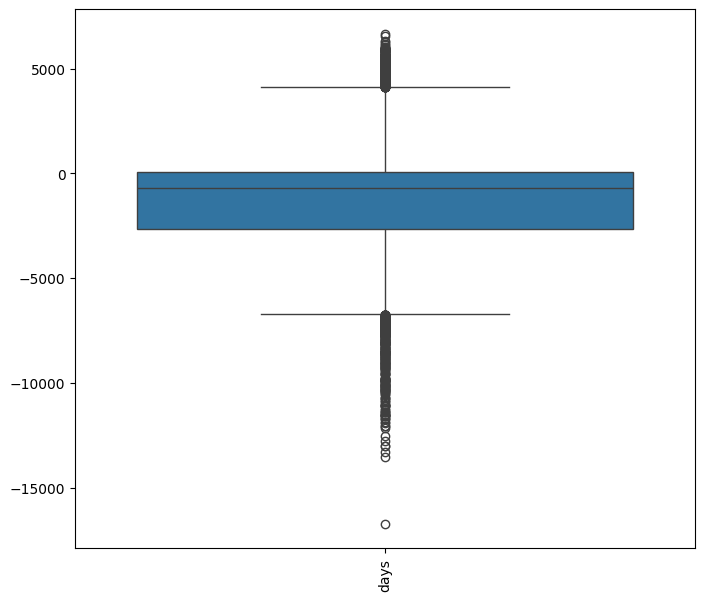

In [33]:
numeric_columns = ['days']

"""Create a box plot for numerical columns"""
plt.figure(figsize=(8, 7))
sns.boxplot(data=data_4[numeric_columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

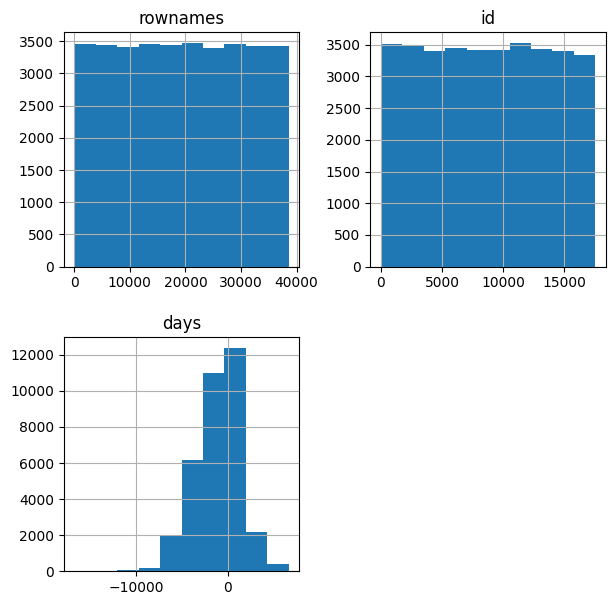

In [43]:
data_4.hist(figsize=(7,7))
plt.show()

In [34]:
data_4['event'].value_counts()

event
dyslipidemia      10462
htn                7097
nafld              3864
diabetes           3452
ang/isc            2235
stroke             2054
afib               1935
heart failure      1869
MI                 1199
cardiac arrest      173
Name: count, dtype: int64

Выводы: За 17,5 лет наблюдения  среди 17549пациентов (47% мужчин, ср.возраст 53[15]лет, ср. ИМТ =30[7] кг на кв метр) было выявлено 8% смертей( ср.возраст мужичин умерших был 68 лет, женщин 71 год ). Было выявлено 8870 случаев НАЖДП. В среднем время наблюдения до развития события для кажного участника составило 2410 дней(6,5 лет). Ожирение в среднем не было связано со смертельным исходом как у мужщин так и у женщин, с которым умеренно коррелировал возраст(r=0,33). 
 
в связи с 80 % пропущенных данных обследованих крови и статуса курения, эти данные были удалены из анализа.
Ортицательные значения дней соответсвовали периоду до выяления НАЖДП, положительные -последующему налюдению.

Комментарий: закодированные временные данные не удалось выяснить(не сообразила как). Работаю над этим. Задание очень понравилось .